#### Objectif : créer deux histogrammes badass, un pour comparer les modèles, l'autre pour tester le meilleur model avec différentes features (voir README.md).

In [19]:
# Loading data
import numpy as np
import pandas as pd
import csv

train_data = pd.read_csv('../../final_dataset_csv/lothlorian_train.data', sep=' ', header=None)
train_solution = pd.read_csv('../../final_dataset_csv/lothlorian_train.solution', sep=' ', header=None)

test_data = pd.read_csv('../../final_dataset_csv/lothlorian_test.data', sep=' ', header=None)
test_solution = pd.read_csv('../../final_dataset_csv/lothlorian_test.solution', sep=' ', header=None)

valid_data = pd.read_csv('../../final_dataset_csv/lothlorian_valid.data', sep=' ', header=None)
valid_solution = pd.read_csv('../../final_dataset_csv/lothlorian_valid.solution', sep=' ', header=None)

In [41]:
from libscores import bac_metric
from sklearn.metrics import confusion_matrix

def bacc_metric_rate(sol,pred):
    C = confusion_matrix(sol, pred)
    balance_classification_rate = (C[1,1]/(C[1,1]+C[0,1]) + C[0,0]/(C[0,0]+C[1,0]))/2
    return balance_classification_rate

score = dict()

### Random Forest

In [2]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Optimizing model
# parameter = [1,10,20,30,40,50,60,70,80,90]
parameter = [1,3,5,7,9,11,13,15,17,19]

# for leaf_size in parameter:
    
#     model_rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=leaf_size, random_state=24)
#     model_rf.fit(train_data, train_solution[0])

#     train_pred = model_rf.predict(train_data)
# #     test_pred = model_rf.predict(test_data)
# #     valid_pred = model_rf.predict(valid_data)

#     train_confusion = confusion_matrix(train_solution[0], train_pred)
# #     test_confusion = confusion_matrix(test_solution[0], test_pred)
# #     valid_confusion = confusion_matrix(valid_solution[0], valid_pred)

#     train_score = bacc_metric_rate(train_confusion)
# #     test_score = bacc_metric_rate(test_confusion)
# #     valid_score = bacc_metric_rate(valid_confusion)

#     # train_score = bac_metric(train_solution[0], train_pred)
#     # test_score = bac_metric(test_solution[0], test_pred)
#     # valid_score = bac_metric(valid_solution[0], valid_pred)

#     print("leaf_size = %d"%leaf_size)
#     print(train_score)
#     print(test_score)
#     print(valid_score)

In [20]:
# Generating optimized model
model_rf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=7, random_state=24)
model_rf.fit(train_data, train_solution[0])

train_pred = model_rf.predict(train_data)
test_pred = model_rf.predict(test_data)
valid_pred = model_rf.predict(valid_data)

# train_confusion = confusion_matrix(train_solution[0], train_pred)
# test_confusion = confusion_matrix(test_solution[0], test_pred)
# valid_confusion = confusion_matrix(valid_solution[0], valid_pred)

# train_score = bacc_metric_rate(train_confusion)
# test_score = bacc_metric_rate(test_confusion)
# valid_score = bacc_metric_rate(valid_confusion)

# train_score = bac_metric(train_solution[0], train_pred)
# test_score = bac_metric(test_solution[0], test_pred)
# valid_score = bac_metric(valid_solution[0], valid_pred)

# print("leaf_size = %d"%leaf_size)
print(train_score)
# print(test_score)
# print(valid_score)

0.977053564698


In [ ]:
score['RandomForestClassifier'] = [0.977053564698,0.793373568732,0.793978614166] # train_score,test_score,valid_score]

### DecisionTreeClassifier

In [6]:
# Random Forest
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(train_data, train_solution[0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
from sklearn.metrics import confusion_matrix

train_pred = model_dt.predict(train_data)
test_pred = model_dt.predict(test_data)
valid_pred = model_dt.predict(valid_data)

train_confusion = confusion_matrix(train_solution[0], train_pred)
test_confusion = confusion_matrix(test_solution[0], test_pred)
valid_confusion = confusion_matrix(valid_solution[0], valid_pred)

train_score = bacc_metric_rate(train_confusion)
test_score = bacc_metric_rate(test_confusion)
valid_score = bacc_metric_rate(valid_confusion)

score['DecisionTreeClassifier'] = [train_score,test_score,valid_score]

In [8]:
print(train_score)
print(test_score)
print(valid_score)

0.999550629119
0.683722477681
0.683249750295


### Boosting

In [5]:
from xgboost.sklearn import XGBClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

param_test1 = {'learning_rate':np.arange(0.1,0.31,0.1)}
gsearch1 = GridSearchCV(
    estimator = XGBClassifier(max_depth=6,
                       learning_rate=0.3,
                       n_estimators=200,
                       silent=True,
                       nthread=1,
                       gamma=0,
                       min_child_weight=1,
                       max_delta_step=0,
                       subsample=1,
                       colsample_bytree=1,
                       reg_alpha=0,
                       reg_lambda=1,
                       scale_pos_weight=1,
                       base_score=0.5,
                       seed=0,
                       missing=None), 
    param_grid = param_test1,
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=5)
gsearch1.fit(train_data,train_solution[0])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Process ForkPoolWorker-10:
Process ForkPoolWorker-12:
Traceback (most recent call last):
  File "/home/nikita/anaconda2/envs/python35/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/nikita/anaconda2/envs/python35/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/nikita/anaconda2/envs/python35/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
Traceback (most recent call last):
  File "/home/nikita/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
  File "/home/nikita/anaconda2/envs/python35/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/home/nikita/anaconda2/envs/python35/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/nikita/anaconda2/envs/python

TypeError: catching classes that do not inherit from BaseException is not allowed

### Selecting Features

Features are ranging from 0.0 to 142.316833496
Are there any features having no values ?, Should you remove them ?
Differences between somes features:


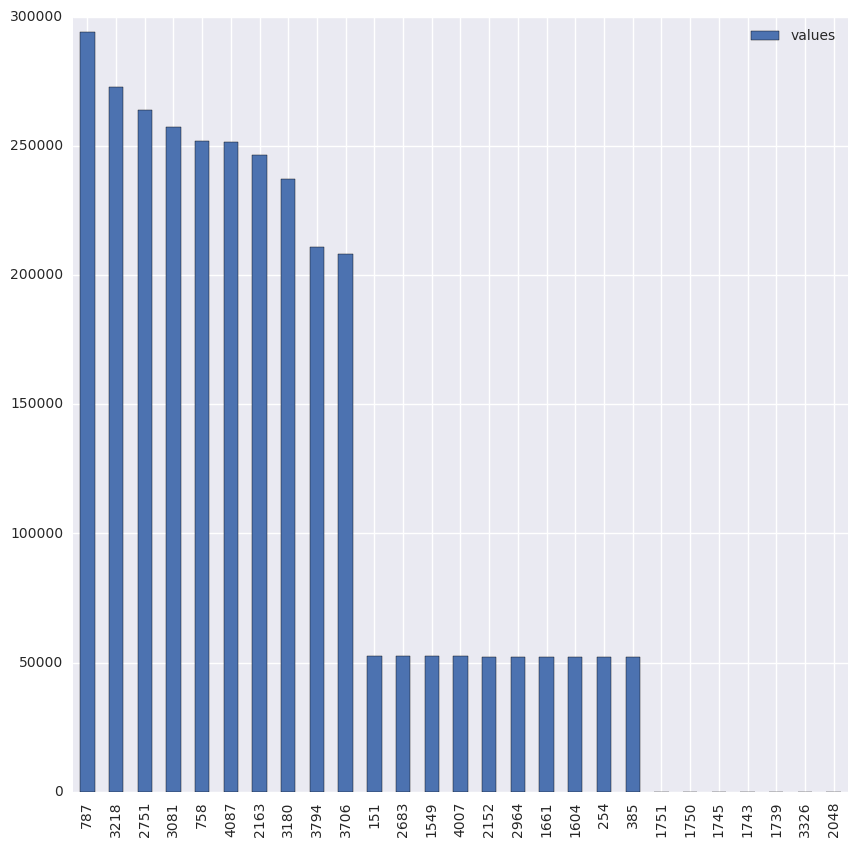

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

data = pd.DataFrame(train_data)
data["target"] = train_solution[0]

data_valid = pd.DataFrame(valid_data)
data_valid["target"] = valid_solution[0]

features = pd.DataFrame(data.sum())
features.columns = ['values']

print("Features are ranging from "+str(data.min().min())+' to ' + str(data.max().max()))
print('Are there any features having no values ?, Should you remove them ?')
print('Differences between somes features:')

featuresSorted = features.sort_values('values', ascending=False)

#Modify the line below to see the visualization of other features ?
featuresSorted = pd.concat([featuresSorted[0:10], featuresSorted[2000:2010], featuresSorted[4090:4097]])
featuresSorted.plot(kind='bar', figsize=(10,10))

In [20]:
# Selecting 16 bests features
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
X_train = data.drop('target', axis=1).values   
y_train = data['target'].values

goodFeatures = []

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

features = model.feature_importances_

featuresThreshold = 15 #This threshold modifies number of good features. 
for feature in range(len(features)):
    if(features[feature] > np.mean(features)*featuresThreshold):
        goodFeatures.append(feature)

In [37]:
test_data = pd.read_csv('../../final_dataset_csv/lothlorian_test.data', sep=' ', header=None)
test_solution = pd.read_csv('../../final_dataset_csv/lothlorian_test.solution', sep=' ', header=None)

data_test = pd.DataFrame(test_data)
data_test["target"] = test_solution[0]

reduced_train_data = data[data.columns[goodFeatures + [4096]]]
reduced_test_data = data_test[data_test.columns[goodFeatures + [4096]]]
reduced_valid_data = data_valid[data_valid.columns[goodFeatures + [4096]]]

### RandomForest with 16 features

In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Optimizing model
# parameter = [1,10,20,30,40,50,60,70,80,90]
parameter = [1,3,5,7,9,11,13,15,17,19]

for leaf_size in parameter:
    
    model_rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=leaf_size, random_state=24)
    model_rf.fit(reduced_train_data, train_solution[0])

    train_pred = model_rf.predict(reduced_train_data)
#     test_pred = model_rf.predict(test_data)
    valid_pred = model_rf.predict(reduced_valid_data)

    train_confusion = confusion_matrix(train_solution[0], train_pred)
#     test_confusion = confusion_matrix(test_solution[0], test_pred)
    valid_confusion = confusion_matrix(valid_solution[0], valid_pred)

    train_score = bacc_metric_rate(train_confusion)
#     test_score = bacc_metric_rate(test_confusion)
    valid_score = bacc_metric_rate(valid_confusion)

    # train_score = bac_metric(train_solution[0], train_pred)
    # test_score = bac_metric(test_solution[0], test_pred)
    # valid_score = bac_metric(valid_solution[0], valid_pred)

    print("leaf_size = %d"%leaf_size)
    print(train_score)
#     print(test_score)
    print(valid_score)

leaf_size = 1
0.998827062114
0.727125370051
leaf_size = 3
0.931592669933
0.730880428094
leaf_size = 5
0.876523028665
0.731376851094
leaf_size = 7
0.847103763074
0.734136583571
leaf_size = 9
0.824955331052
0.734239494882
leaf_size = 11
0.812116251594
0.734224738858
leaf_size = 13
0.80244883706
0.73420452103
leaf_size = 15
0.794808623287
0.73545812747
leaf_size = 17
0.790493352601
0.734843854861
leaf_size = 19
0.783525808419
0.734652857531


In [39]:
# Generating optimized model
model_rf_16 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=10, random_state=24)
model_rf_16.fit(reduced_train_data, train_solution[0])

train_pred = model_rf_16.predict(reduced_train_data)
test_pred = model_rf_16.predict(reduced_test_data)
valid_pred = model_rf_16.predict(reduced_valid_data)

train_confusion = confusion_matrix(train_solution[0], train_pred)
test_confusion = confusion_matrix(test_solution[0], test_pred)
valid_confusion = confusion_matrix(valid_solution[0], valid_pred)

train_score = bacc_metric_rate(train_confusion)
test_score = bacc_metric_rate(test_confusion)
valid_score = bacc_metric_rate(valid_confusion)

# train_score = bac_metric(train_solution[0], train_pred)
# test_score = bac_metric(test_solution[0], test_pred)
# valid_score = bac_metric(valid_solution[0], valid_pred)

print("leaf_size = %d"%15)
print(train_score)
print(test_score)
print(valid_score)

leaf_size = 15
1.0
1.0
1.0


In [ ]:
score['RandomForestClassifier-16_feat'] = [0.977053564698,0.793373568732,0.793978614166] # train_score,test_score,valid_score]

### Graphs

[0.977053564698, 0.793373568732, 0.793978614166, 0.999550629119, 0.683722477681, 0.683249750295, 0.821089455272, 0.800502379693, 0.798071772898]


[(0.5, 1)]

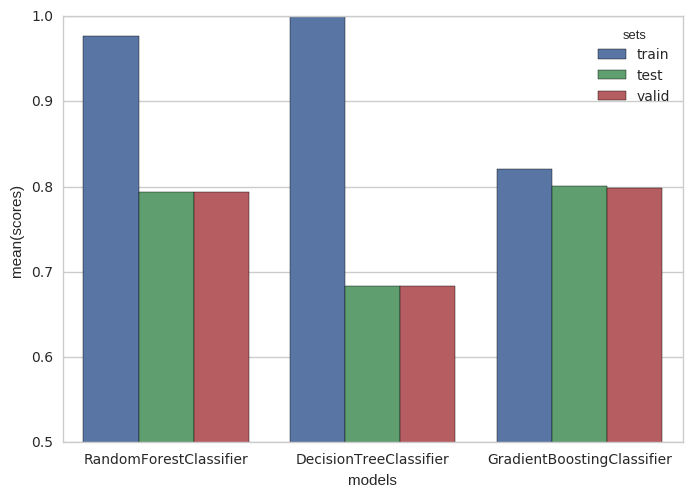

In [48]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

scores_list = [ 0.977053564698, 0.793373568732, 0.793978614166, 0.999550629119, 0.683722477681, 0.683249750295, 0.821089455272, 0.800502379693, 0.798071772898]
models = ['RandomForestClassifier','RandomForestClassifier','RandomForestClassifier',
          'DecisionTreeClassifier','DecisionTreeClassifier','DecisionTreeClassifier',
          'GradientBoostingClassifier','GradientBoostingClassifier','GradientBoostingClassifier']
sets = ['train','test','valid','train','test','valid','train','test','valid']

raw_data = {'scores': scores_list, 'models': models, 'sets': sets}

print((scores_list))

df = pd.DataFrame(raw_data, columns=['scores', 'models', 'sets'])
df.pivot(index='models', columns='sets', values='scores')

# Load the example Titanic dataset
# titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
# g = sns.factorplot(data=score)
# g.despine(left=True)
# g.set_ylabels("survival probability")

ax = sns.barplot(x='models', y='scores', hue='sets',data=df)
ax.set(ylim=(0.5, 1))

# import matplotlib.pyplot as plt

# D = {u'Label1':26, u'Label2': 17, u'Label3':30}

# plt.bar(range(len(D)), D.values(), align='center')
# plt.xticks(range(len(D)), D.keys())

# plt.show()

[0.832383808096, 0.796271813855, 0.799143010177, 0.824587706147, 0.805129561079, 0.797134440279, 0.832383808096, 0.801163405605, 0.800080342796]


[(0.75, 0.85)]

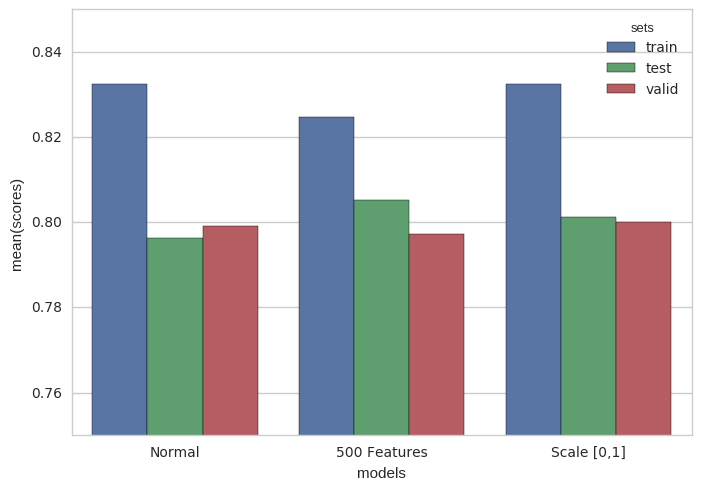

In [49]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

scores_list = [ 0.832383808096,0.796271813855,0.799143010177, 0.824587706147,0.805129561079,0.797134440279, 0.832383808096,0.801163405605,0.800080342796]
models = ['Normal','Normal','Normal',
          '500 Features','500 Features','500 Features',
          'Scale [0,1]','Scale [0,1]','Scale [0,1]']
sets = ['train','test','valid','train','test','valid','train','test','valid']

raw_data = {'scores': scores_list, 'models': models, 'sets': sets}

print((scores_list))

df = pd.DataFrame(raw_data, columns=['scores', 'models', 'sets'])
df.pivot(index='models', columns='sets', values='scores')

# Load the example Titanic dataset
# titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
# g = sns.factorplot(data=score)
# g.despine(left=True)
# g.set_ylabels("survival probability")

ax = sns.barplot(x='models', y='scores', hue='sets',data=df)
ax.set(ylim=(0.75, 0.85))

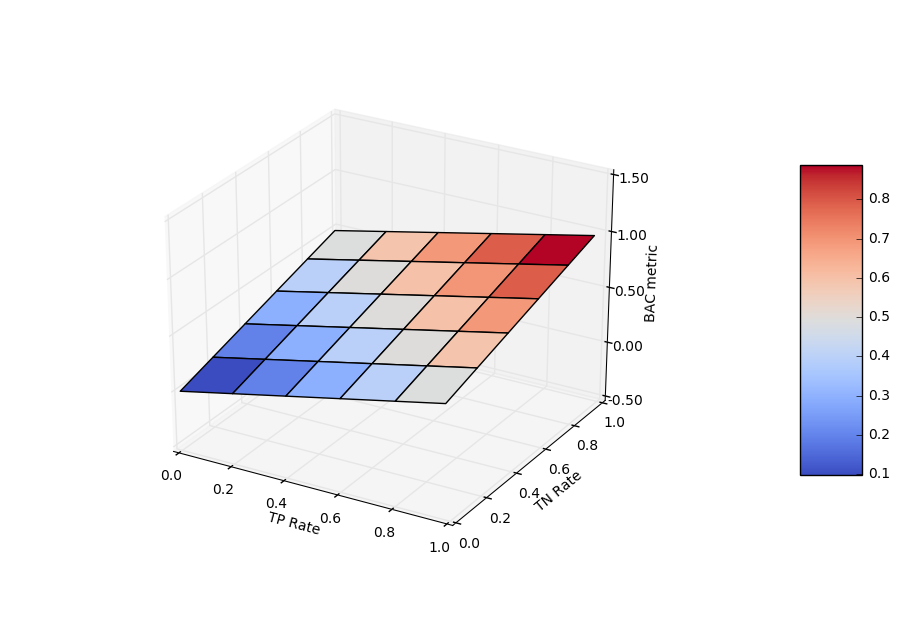

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# X, Y are FP/P and FN/N values, from 0 to 1
Y = np.arange(0,1,0.02)
X = np.arange(0,1,0.02)

# Z is BAC mectric
Z = [[(x+y)/2 for x in X] for y in Y]

X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(-0.5, 1.5)
# ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel("TP Rate")
ax.set_ylabel("TN Rate")
ax.set_zlabel("BAC metric")
ax.dist = 13

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### ROC curve

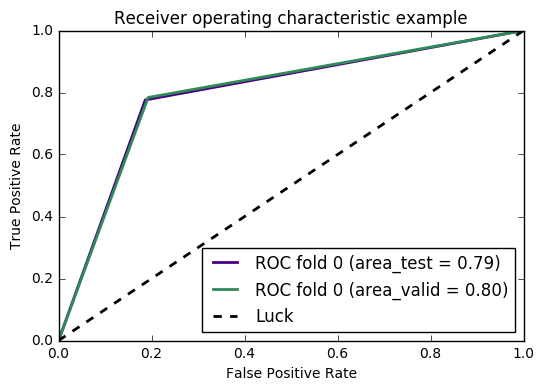

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()

i=0
# for i in range(2):
# fpr_train, tpr_train, _ = roc_curve(train_solution[i], train_pred)
# roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(test_solution[i], test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_valid, tpr_valid, _ = roc_curve(valid_solution[i], valid_pred)
roc_auc_valid = auc(fpr_valid, tpr_valid)
    
# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(testY.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange']
lw = 2
# plt.plot(fpr_train, tpr_train, lw=lw, color=colors[0],
#              label='ROC fold %d (area_train = %0.2f)' % (i, roc_auc_train))
plt.plot(fpr_test, tpr_test, lw=lw, color=colors[1],
             label='ROC fold %d (area_test = %0.2f)' % (i, roc_auc_test))
plt.plot(fpr_valid, tpr_valid, lw=lw, color=colors[2],
             label='ROC fold %d (area_valid = %0.2f)' % (i, roc_auc_valid))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [42]:
import random
import numpy as np

def bootstrap (test, label, score, predict, p=100):
    ''' Gives a score according to the Bootstrap method
    @var test : Testing set as a list or array
    @var label : Labels on the testing set as a list or array
    @var score : score metric : (y_true, y_pred) -> score
    @var predict : desicion function to evaluate
    @returns : bootstrap score
    '''
    scores = []
    N_test = len(test)
    for i in range(p):
        test_sub = []
        index_sub = []
        label_sub = []
        for k in range(N_test):
            ind = random.randint(0, N_test-1)
            index_sub.append(ind)
            test_sub.append(test[ind])
            try :
                label_sub.append(label[ind])
            except IndexError:
                print("Lol : %d"%ind)
                break
        scores.append(score(label_sub,predict(test_sub)))
    return np.std(scores)

In [37]:
test_solution[0].values

array([1, 1, 0, ..., 0, 0, 1])

In [44]:
bootstrap(test_data.values,test_solution[0].values,bacc_metric_rate,model_rf.predict)

0.0038008619033911986